In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import math

import matplotlib.pyplot as plt

# Needed only in Jupyter to render properly in-notebook
%matplotlib inline

# Homework 4

## Chinmai Raman

### Using pandas on Global Historical Climatology Network data

In [2]:
df = pd.read_csv("598354.csv")
df.head()

,STATION,STATION_NAME,DATE,MDPR,DAPR,PRCP,TMAX,TMIN,TOBS
0,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,20140101,-9999,-9999,-9999,217,83,-9999
1,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,20140102,-9999,-9999,-9999,217,72,-9999
2,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,20140103,-9999,-9999,-9999,206,78,-9999
3,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,20140104,-9999,-9999,-9999,206,94,-9999
4,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,20140105,-9999,-9999,-9999,206,100,-9999


The data provided only contains data from locations around California. In many instances, the temperature
(max and min) is provided, but not the precipitation, or vice-versa, especially in the month of June, 2015.
Most of the data points for precipitation in the month of June, 2015 are 0, which is not surprising given
that California experiences mostly Winter rains, and we have also been experiencing a drought for a few
years. I chose Blue Canyon Airport as my location because it contains both precipiation and temperature
data, and the area experienced some rain during June of 2015.

### Data for Blue Canyon Airport, California

In [3]:
data = df.ix[383819:384427]
new_data = pd.DataFrame(data, columns = ['a', 'b', 'DATE', 'c', 'd', 'e', 'PRCP', 'TMAX', 'TMIN', 'f'])
newer_data = new_data.drop(['a', 'b', 'c', 'd', 'e', 'f'], axis = 1)
newer_data

,DATE,PRCP,TMAX,TMIN
383819,20140103,0,150,78
383820,20140104,0,128,56
383821,20140105,0,161,56
383822,20140106,0,111,67
383823,20140107,0,94,44
383824,20140108,0,72,22
383825,20140109,0,61,17
383826,20140110,0,122,22
383827,20140111,104,89,0
383828,20140112,0,83,-16


### Maximum and Minimum temperatures in January of 2014

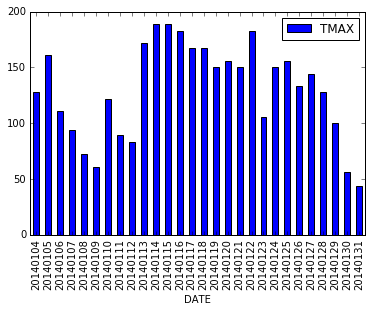

In [13]:
pd.DataFrame(newer_data[1:29]).plot('DATE', 'TMAX', kind = 'bar')

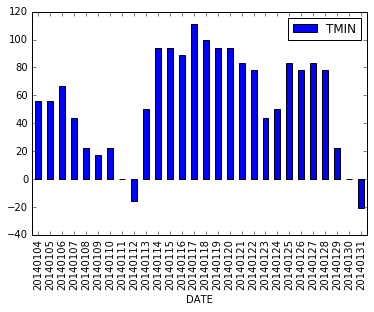

In [14]:
pd.DataFrame(newer_data[1:29]).plot('DATE', 'TMIN', kind = 'bar')

In [15]:
idx = newer_data[newer_data['TMIN'] == - 9999].index.tolist()
my_data = newer_data.drop(idx)

### Histograms of the Maximum and Minimum temperatures over their respective ranges

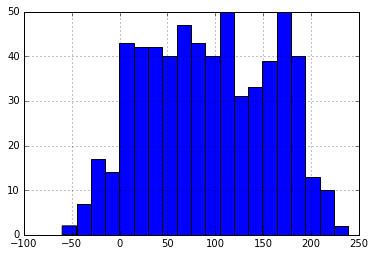

In [16]:
my_data['TMIN'].hist(bins=20)

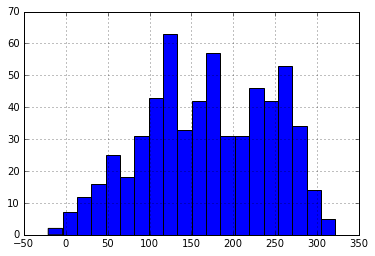

In [17]:
my_data['TMAX'].hist(bins=20)

### Recorded Rainfall in June, 2015

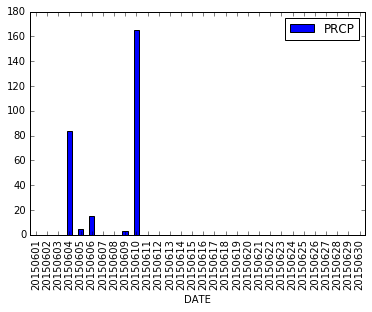

In [40]:
rain_data = my_data.drop(['TMAX', 'TMIN'], axis = 1)
rain_data.ix[20150601:20150630].plot(kind = 'bar')